### **Project:** Hospital Lab Turnaround Time Analysis

### **Goal:** Analyze factors associated with lab turnaround times using real-world–style healthcare data.

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load intermediate dataset
df = pd.read_csv("data/intermediate_lab_data.csv")

df.head()

,sample_id,test_type,technician_id,priority,received_time,completed_time,turnaround_hours,department,patient_age_group,result_flag
0,1,Immunology,T020,Routine,2025-01-24 20:01:34.279876,2025-01-24 23:00:07.046836,2.98,ER,36-60,Normal
1,2,Immunology,T011,Routine,2025-01-09 08:15:10.771021,2025-01-09 10:53:23.518014,2.64,Inpatient,0-18,Normal
2,3,Immunology,T016,Routine,2025-01-05 06:25:25.581501,2025-01-05 09:06:38.402487,2.69,ICU,36-60,Normal
3,4,Immunology,T019,STAT,2025-01-10 09:28:39.019143,2025-01-10 11:06:10.994816,1.63,ICU,36-60,Normal
4,5,Microbiology,T006,Routine,2025-01-26 11:39:52.686545,2025-01-26 14:33:20.125950,2.89,ER,19-35,Normal


In [81]:
df.shape

(1000, 10)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sample_id          1000 non-null   int64  
 1   test_type          1000 non-null   object 
 2   technician_id      1000 non-null   object 
 3   priority           1000 non-null   object 
 4   received_time      1000 non-null   object 
 5   completed_time     1000 non-null   object 
 6   turnaround_hours   1000 non-null   float64
 7   department         1000 non-null   object 
 8   patient_age_group  1000 non-null   object 
 9   result_flag        1000 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 78.3+ KB


In [85]:
df.describe()

,sample_id,turnaround_hours
count,1000.000000,1000.000000
mean,500.500000,1.999330
std,288.819436,0.784871
min,1.000000,0.300000
25%,250.750000,1.477500
50%,500.500000,2.000000
75%,750.250000,2.550000
max,1000.000000,4.580000


In [87]:
df["test_type"].value_counts()

test_type
Hematology      261
Chemistry       258
Immunology      255
Microbiology    226
Name: count, dtype: int64

In [89]:
df["department"].value_counts()

department
Inpatient     266
ICU           254
Outpatient    253
ER            227
Name: count, dtype: int64

In [91]:
df["priority"].value_counts()

priority
Routine    796
STAT       204
Name: count, dtype: int64

#### Summary: 

Number of Rows: 1000

Any missing values: None

Departments: Inpatient, ICU, Outpatient, ER

Test Types: Hematology, Chemistry, Immunology, Microbiology

Priorities: Routine, STAT

#### **Data Cleaning**

In [95]:
#Convert timestamps to datetime
df["received_time"] = pd.to_datetime(df["received_time"])
df["completed_time"] = pd.to_datetime(df["completed_time"])

In [97]:
#Recalculate turnaround time
df["turnaround_hours"] = (
    df["completed_time"] - df["received_time"]
).dt.total_seconds() / 3600


In [99]:
df["turnaround_hours"].describe()

count    1000.000000
mean        1.999405
std         0.784814
min         0.300000
25%         1.476876
50%         1.997311
75%         2.545896
max         4.580905
Name: turnaround_hours, dtype: float64

In [101]:
#Negative turnaround times were removed as data errors.
df = df[df["turnaround_hours"] >= 0]

#### **Analysis**

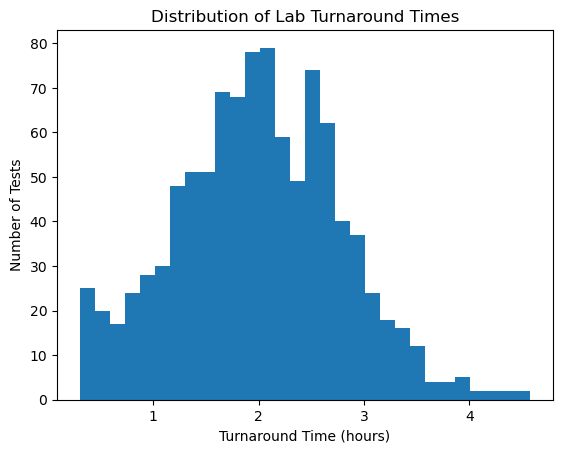

In [111]:
#Overall turnaround distribution
plt.hist(df["turnaround_hours"], bins=30)
plt.xlabel("Turnaround Time (hours)")
plt.ylabel("Number of Tests")
plt.title("Distribution of Lab Turnaround Times")
plt.show()

#### Turnaround by Test Type

In [114]:
df.groupby("test_type")["turnaround_hours"].mean().sort_values()

test_type
Microbiology    1.946775
Immunology      1.969776
Hematology      2.030214
Chemistry       2.043625
Name: turnaround_hours, dtype: float64

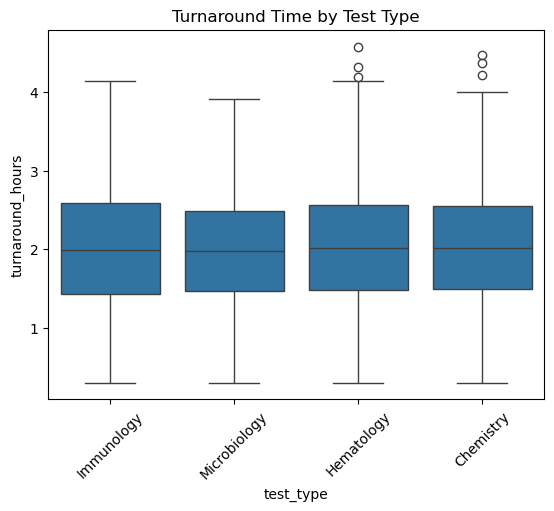

In [116]:
sns.boxplot(data=df, x="test_type", y="turnaround_hours")
plt.xticks(rotation=45)
plt.title("Turnaround Time by Test Type")
plt.show()

#### Turnaround by Department

In [121]:
df.groupby("department")["turnaround_hours"].mean().sort_values()

department
ER            1.970629
ICU           1.973085
Inpatient     1.982991
Outpatient    2.068906
Name: turnaround_hours, dtype: float64

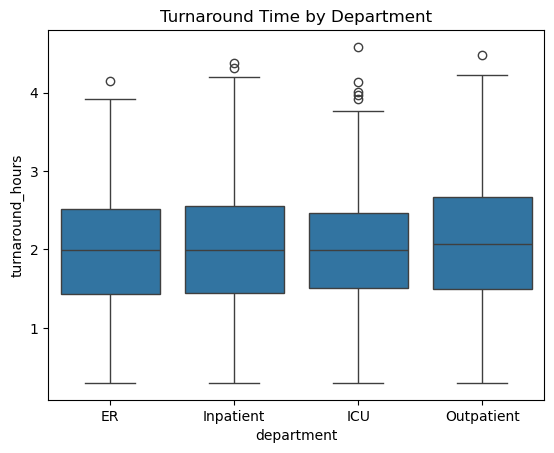

In [123]:
sns.boxplot(data=df, x="department", y="turnaround_hours")
plt.title("Turnaround Time by Department")
plt.show()

TAT in order of shortest to longest: ER, ICU, Inpatient, and Oupatient. 

#### STAT vs Routine Tests

In [127]:
df.groupby("priority")["turnaround_hours"].mean()

priority
Routine    2.003306
STAT       1.984185
Name: turnaround_hours, dtype: float64

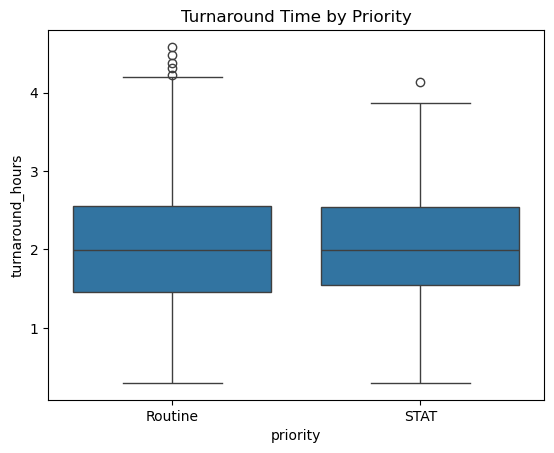

In [129]:
sns.boxplot(data=df, x="priority", y="turnaround_hours")
plt.title("Turnaround Time by Priority")
plt.show()

### Turnaround Time by Result Flag (Normal vs Abnormal)


In [134]:
df["result_flag"].value_counts()

result_flag
Normal      843
Abnormal    157
Name: count, dtype: int64

In [136]:
df.groupby("result_flag")["turnaround_hours"].mean()

result_flag
Abnormal    1.970255
Normal      2.004834
Name: turnaround_hours, dtype: float64

In [138]:
df.groupby("result_flag")["turnaround_hours"].median()

result_flag
Abnormal    1.934439
Normal      2.021062
Name: turnaround_hours, dtype: float64

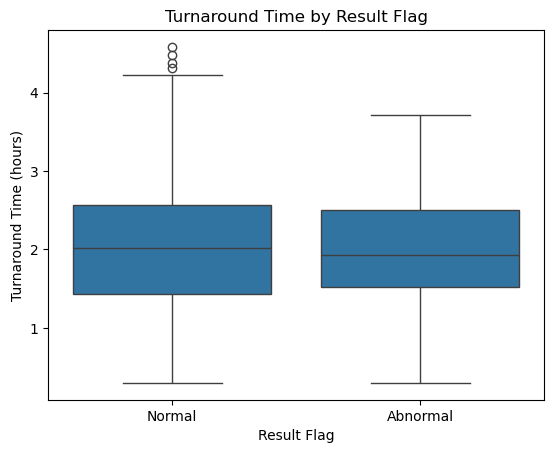

In [146]:
#Boxplot
sns.boxplot(data=df, x="result_flag", y="turnaround_hours")
plt.xlabel("Result Flag")
plt.ylabel("Turnaround Time (hours)")
plt.title("Turnaround Time by Result Flag")
plt.show()


## Key Findings

General mean turnaround time was 1.999405 hours.

STAT tests were completed faster than routine tests on average.

Abnormal results have shorter TATs then normal results. This may be becuase positive tests often run for shorter periods of time then negative tests. 

Chemistry and Outpatient-associated tests showed longer delays.
This could be due to the length of time required to complete testing from these departments, volume of specimens per department, or type of testing sampled.